In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [28]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [29]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [30]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [31]:
# If column has 20% or more null values, we drop it.
checking_null_cols = df.isna().sum()/len(df)

list(checking_null_cols[checking_null_cols > 0.2].index)
df.drop(list(checking_null_cols[checking_null_cols > 0.2].index), axis = 1, inplace = True)

In [37]:
len(df.columns)

76

In [55]:
rows_with_null_values = len(df.dropna(axis = 0, how = 'any'))
print(f'Count of rows with at least one missing value in df: {rows_with_null_values}')
print(f'Count of rows in df: {len(df)}')
rows_with_six_null_values = len(df.dropna(axis = 0, how = "any", thresh = 70))
print(f'Count of rows with at least six missing values in df: {rows_with_six_null_values}')
print('We decide not to drop any row because of null values. There are only 7 rows that have at least 6 (out of 76 columns in the DataFrame) missing values. We can work with them.')

Count of rows with at least one missing value in df: 1094
Count of rows in df: 1460
Count of rows with at least six missing values in df: 1453
We decide not to drop any row because of null values. There are only 7 rows that have at least 6 (out of 76 columns in the DataFrame) missing values. We can work with them.


In [94]:
# Converting Categorical to Numerical data
df['ExterQualNum'] = np.where(df['ExterQual'] == 'Po', 1,np.where(df['ExterQual'] == 'Fa', 2,np.where(df['ExterQual'] == 'TA', 3,np.where(df['ExterQual'] == 'Gd', 4,np.where(df['ExterQual'] == 'Ex', 5,0)))))
df['ExterCondNum'] = np.where(df['ExterCond'] == 'Po', 1,np.where(df['ExterCond'] == 'Fa', 2,np.where(df['ExterCond'] == 'TA', 3,np.where(df['ExterCond'] == 'Gd', 4,np.where(df['ExterCond'] == 'Ex', 5,0)))))
df['KitchenQualNum'] = np.where(df['KitchenQual'] == 'Po', 1,np.where(df['KitchenQual'] == 'Fa', 2,np.where(df['KitchenQual'] == 'TA', 3,np.where(df['KitchenQual'] == 'Gd', 4,np.where(df['KitchenQual'] == 'Ex', 5,0)))))
df['GarageQualNum'] = np.where(df['GarageQual'] == 'Po', 1,np.where(df['GarageQual'] == 'Fa', 2,np.where(df['GarageQual'] == 'TA', 3,np.where(df['GarageQual'] == 'Gd', 4,np.where(df['GarageQual'] == 'Ex', 5,0)))))
df['GarageCondNum'] = np.where(df['GarageCond'] == 'Po', 1,np.where(df['GarageCond'] == 'Fa', 2,np.where(df['GarageCond'] == 'TA', 3,np.where(df['GarageCond'] == 'Gd', 4,np.where(df['GarageCond'] == 'Ex', 5,0)))))
df['BsmtQualNum'] = np.where(df['BsmtQual'] == 'Po', 1,np.where(df['BsmtQual'] == 'Fa', 2,np.where(df['BsmtQual'] == 'TA', 3,np.where(df['BsmtQual'] == 'Gd', 4,np.where(df['BsmtQual'] == 'Ex', 5,0)))))
df['BsmtCondNum'] = np.where(df['BsmtCond'] == 'Po', 1,np.where(df['BsmtCond'] == 'Fa', 2,np.where(df['BsmtCond'] == 'TA', 3,np.where(df['BsmtCond'] == 'Gd', 4,np.where(df['BsmtCond'] == 'Ex', 5,0)))))


In [146]:
df_dum = pd.get_dummies(df['Neighborhood'],drop_first = True)

In [93]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [95]:
df['GarageYrBlt'].value_counts().head()

0       81
2005    65
2006    59
2004    53
2003    50
Name: GarageYrBlt, dtype: int64

In [68]:

df['GarageYrBlt'] = [int(x) for x in df['GarageYrBlt'].fillna('0')]
df.astype({'GarageYrBlt':'int64'})
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [98]:
# We want to aggregate data on baths, as they separately do not bring us much information:
df['TotalBaths'] = df['FullBath'] + df['BsmtFullBath'] + 0.5 * df['HalfBath'] + 0.5 * df['BsmtHalfBath']

df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [136]:
df['Age2'] = (2020 - df['YearBuilt']) ** 2
df[['YearBuilt','Age2']].head()

,YearBuilt,Age2
0,2003,289
1,1976,1936
2,2001,361
3,1915,11025
4,2000,400


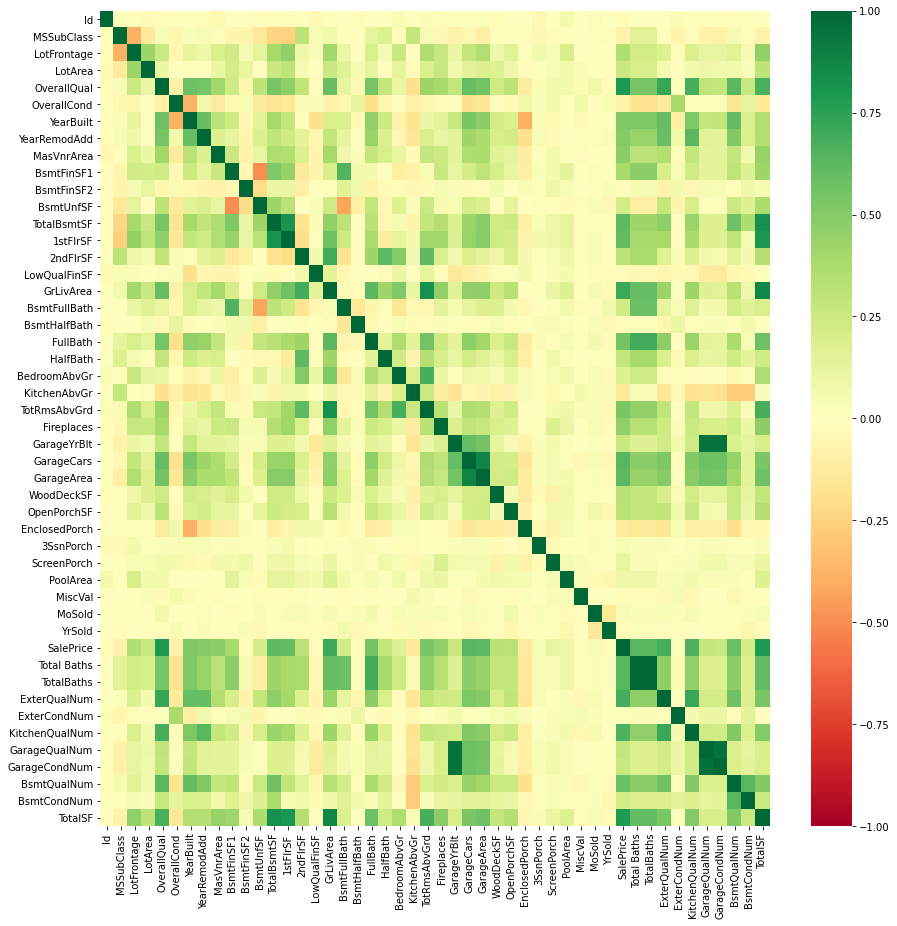

In [99]:
plt.figure(figsize = [15,15])
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = 'RdYlGn')

In [100]:
# The following variables seem to have a positive correlation with SalePrice. Let's examine them in detail:
df[['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','YearBuilt','YearRemodAdd','TotalBaths','TotalSF','ExterQualNum','KitchenQualNum','BsmtQualNum']].corr()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,YearBuilt,YearRemodAdd,TotalBaths,TotalSF,ExterQualNum,KitchenQualNum,BsmtQualNum
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.522897,0.507101,0.631731,0.782260,0.682639,0.659600,0.585207
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.572323,0.550684,0.541063,0.668155,0.726278,0.673331,0.629379
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.199010,0.287389,0.595169,0.874373,0.435986,0.420563,0.327956
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.537850,0.420622,0.483578,0.536413,0.526390,0.509810,0.449194
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.478954,0.371600,0.451567,0.563747,0.495778,0.489606,0.406109
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,1.000000,0.592855,0.524298,0.347133,0.598160,0.530165,0.602797
YearRemodAdd,0.507101,0.550684,0.287389,0.420622,0.371600,0.592855,1.000000,0.443719,0.342873,0.587318,0.625316,0.515013
TotalBaths,0.631731,0.541063,0.595169,0.483578,0.451567,0.524298,0.443719,1.000000,0.604324,0.475277,0.464987,0.479532
TotalSF,0.782260,0.668155,0.874373,0.536413,0.563747,0.347133,0.342873,0.604324,1.000000,0.533779,0.502738,0.514299
ExterQualNum,0.682639,0.726278,0.435986,0.526390,0.495778,0.598160,0.587318,0.475277,0.533779,1.000000,0.716122,0.565558


In [105]:
# Examined for fun if there is a higher price for high-end External Quality vs average kitchen than viceversa.
pd.pivot_table(data = df, values = 'SalePrice', index = 'ExterQualNum', columns = 'KitchenQualNum', aggfunc = 'mean')
# Possibly, but we can't say for sure as values do not differ enough.

KitchenQualNum,2,3,4,5
ExterQualNum,,,,
2,79849.125000,98833.333333,NaN,NaN
3,112201.612903,138621.861671,172417.105882,161863.636364
4,NaN,173162.848485,226499.237745,317257.234043
5,NaN,180750.000000,322174.125000,384854.214286


In [109]:
# GarageCars and GarageArea have high correlation between them. We are going to make use of GarageCars, which has a slightly larger correlation with SalePrice.
df[['SalePrice','OverallQual','GrLivArea','GarageCars','YearBuilt','YearRemodAdd','TotalBaths','TotalSF','ExterQualNum','KitchenQualNum','BsmtQualNum']].head()

,SalePrice,OverallQual,GrLivArea,GarageCars,YearBuilt,YearRemodAdd,TotalBaths,TotalSF,ExterQualNum,KitchenQualNum,BsmtQualNum
0,208500,7,1710,2,2003,2003,3.5,2566,4,4,4
1,181500,6,1262,2,1976,1976,2.5,2524,3,3,4
2,223500,7,1786,2,2001,2002,3.5,2706,4,4,4
3,140000,7,1717,3,1915,1970,2.0,2473,3,4,3
4,250000,8,2198,3,2000,2000,3.5,3343,4,4,4


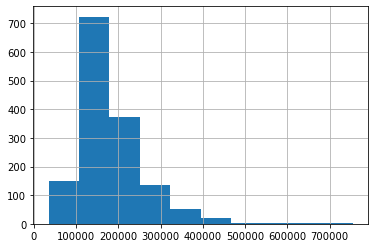

In [85]:
df['SalePrice'].hist()

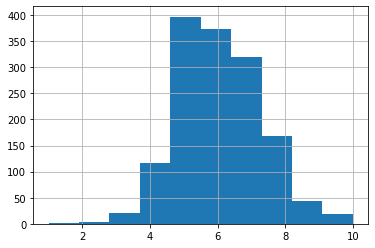

In [86]:
df['OverallQual'].hist()

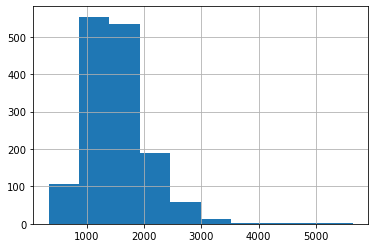

In [87]:
df['GrLivArea'].hist()

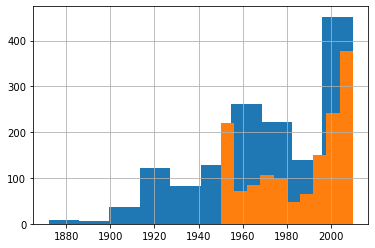

In [90]:
df['YearBuilt'].hist()
df['YearRemodAdd'].hist()
plt.show()

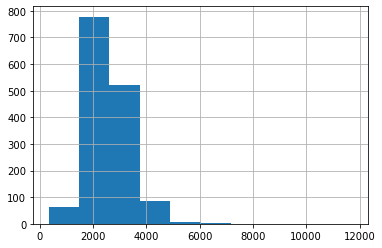

In [110]:
df['TotalSF'].hist()

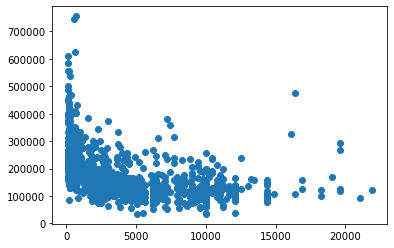

In [137]:
plt.scatter(df['Age2'],df['SalePrice'])
plt.show()

In [147]:
help(df.merge)

Help on method merge in module pandas.core.frame:

merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right frame, similar to a SQL right outer join

In [150]:
df1 = df.merge(df_dum, left_index = True, right_index = True)
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total Baths,TotalBaths,ExterQualNum,ExterCondNum,KitchenQualNum,GarageQualNum,GarageCondNum,BsmtQualNum,BsmtCondNum,TotalSF,Age2,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,3.5,3.5,4,3,4,3,3,4,3,2566,289,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,2.5,2.5,3,3,3,3,3,4,3,2524,1936,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,3.5,3.5,4,3,4,3,3,4,3,2706,361,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,2.0,2.0,3,3,4,3,3,3,4,2473,11025,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,3.5,3.5,4,3,4,3,3,4,3,3343,400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [151]:
df_dum.columns

Index(['Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes',
       'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer',
       'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object')

In [154]:
# We make use of a Multi Linear Regression model to see the effect of a number of picked variables in SalePrice.
X = df1[['OverallQual','TotalSF','GarageCars','TotalBaths','YearBuilt','ClearCr','Crawfor','NoRidge', 'NridgHt', 'Somerst', 'StoneBr', 'Timber', 'Veenker']]
Y = df1['SalePrice']
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     464.8
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:18:10   Log-Likelihood:                -17344.
No. Observations:                1460   AIC:                         3.472e+04
Df Residuals:                    1446   BIC:                         3.479e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.105e+05   8.28e+04     -3.751      0.000   -4.73e+05   -1.48e+05
OverallQual  1.655e+04   1109.535     14.917      0.000    1.44e+04    1.87e+04
TotalSF        32.1458      1.748     18.391      0.000      28.717      35.574
GarageCars   1.259e+04   1675.365      7.516      0.000    9305.697    1.59e+04
TotalBaths   1.149e+04   1630.192      7.050      0.000    8294.274    1.47e+04
YearBuilt     127.5545     43.426      2.937      0.003      42.369     212.740
ClearCr      2.758e+04   6772.911      4.072      0.000    1.43e+04    4.09e+04
Crawfor      3.425e+04   5190.961      6.598      0.000    2.41e+04    4.44e+04
NoRidge      6.097e+04   6025.702     10.118      0.000    4.91e+04    7.28e+04
NridgHt      5.537e+04   4706.629     11.764      0.000    4.61e+04    6.46e+04
Somerst       1.27e+04   4264.223      2.978      0.003    4335.151    2.11e+04
StoneBr      5.836e+04   7384.991      7.903      0.000    4.39e+04    7.28e+04
Timber       1.874e+04   5951.382      3.149      0.002    7064.998    3.04e+04
Veenker      3.597e+04   1.07e+04      3.370      0.001     1.5e+04    5.69e+04
==============================================================================
Omnibus:                      397.638   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33671.360
Skew:                           0.041   Prob(JB):                         0.00
Kurtosis:                      26.526   Cond. No.                     2.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
df1['IsNeighborhoodRich'] = df1['ClearCr'] + df1['Crawfor'] + df1['NoRidge'] + df1['NridgHt'] + df1['Somerst'] + df1['StoneBr'] + df1['Timber'] + df1['Veenker']


In [157]:
# We make use of a Multi Linear Regression model to see the effect of a number of picked variables in SalePrice.
X = df1[['OverallQual','TotalSF','GarageCars','TotalBaths','YearBuilt','IsNeighborhoodRich']]
Y = df1['SalePrice']
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     933.6
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:21:44   Log-Likelihood:                -17391.
No. Observations:                1460   AIC:                         3.480e+04
Df Residuals:                    1453   BIC:                         3.483e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.795e+05   8.13e+04     -3.437      0.001   -4.39e+05    -1.2e+05
OverallQual         1.731e+04   1118.184     15.482      0.000    1.51e+04    1.95e+04
TotalSF               34.7991      1.760     19.772      0.000      31.347      38.252
GarageCars          1.287e+04   1721.409      7.478      0.000    9496.064    1.62e+04
TotalBaths          1.112e+04   1670.007      6.659      0.000    7844.420    1.44e+04
YearBuilt            106.5468     42.808      2.489      0.013      22.575     190.519
IsNeighborhoodRich  3.341e+04   2602.401     12.839      0.000    2.83e+04    3.85e+04
==============================================================================
Omnibus:                      414.659   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41808.210
Skew:                           0.065   Prob(JB):                         0.00
Kurtosis:                      29.215   Cond. No.                     2.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""